In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.cluster import KMeans
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import gensim
import seaborn as sns
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
import warnings
warnings.filterwarnings(action = 'ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
PART 1- IRIS DATA SET

In [3]:
Testdata_df = pd.read_csv("/content/test_data.csv",names=["sepal_length", "sepal_width","petal_length","petal_width"],sep=" ",header=None)

In [4]:
Testdata_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
145,4.5,2.3,1.3,0.3
146,6.0,2.2,5.0,1.5
147,6.2,2.2,4.5,1.5
148,6.0,2.2,4.0,1.0


In [121]:
def kmeans1(X, k):
  diff = 1
  count=0
  #initialize the centroids with random points
  cluster = np.zeros(X.shape[0])
  centroids = Testdata_df.sample(n=k).values
  while diff:
     # for each observation
     distances = cdist(X, centroids ,'cosine')
     cluster = np.array([np.argmin(i) for i in distances])
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
      # if centroids are same then leave
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  count=count+1
  print(count)
  return centroids, cluster

In [130]:
k = 3
centroids, cluster = kmeans1(Testdata_df, k)
print(cluster)

1
[2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 0 2 2 2 2 2 2 2 2 2 1
 1 1 0 2 2 1 1 1 1 1 1 0 0 2 2 2 2 2 1 1 1 1 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 0 0 0 0 2 2 2 2 2 2 1 1 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 1 0
 0 0]


In [11]:
"""writing the predicted data of k_means model into output file """
with open("pred_test_part1_new1.dat", "w") as a_file:
    for i in range(len(cluster)):
        a_file.write(str(int(float(cluster[i]))))
        a_file.write('\n')

In [28]:
def SSE(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += (centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2
  return sum

In [29]:
#sum of squared errors (SSE)
cost_list = []
X=Testdata_df.values
for k in range(1, 21):
     centroids, cluster = kmeans1(X, k)
     #print(centroids, cluster,type(centroids),type(cluster),len(centroids))
    # WCSS (Within cluster sum of square)
     cost = SSE(X, centroids, cluster)
     cost_list.append(cost)

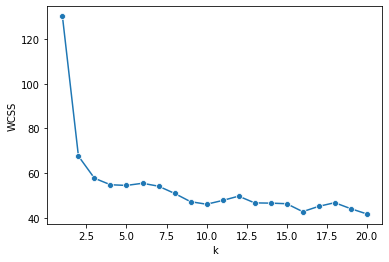

In [17]:
sns.lineplot(x=range(1,21), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [ ]:
PART 2- IMAGE DATA SET

In [31]:
Testdata_img_df = pd.read_csv("/content/test_img_data.csv",sep=",",header=None)
Testdata_img_df=Testdata_img_df.dropna(axis=1,how='any')
Testdata_img_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

In [34]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(Testdata_img_df)
# Create a PCA instance: pca
pca = PCA(n_components=72)
pca_result = pca.fit_transform(X_std)

In [35]:
#time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=8, n_iter=250)
tsne_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.554s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.972949
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.447876
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435

In [36]:
X=pd.DataFrame(tsne_results)
X.shape

(10000, 3)

In [37]:
def kmeans2(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids= X.sample(n=k).values
  while diff:
        distances = cdist(X, centroids ,'cosine')
        #print(distances)
        # store closest centroid
        cluster = np.array([np.argmin(i) for i in distances])
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        #print("centroids",centroids,centroids.shape,"new_centroids",new_centroids,new_centroids.shape)
         # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
          diff = 0
        else:
          centroids = new_centroids
  return centroids, cluster

In [178]:
k=10
Y=Testdata_img_df
centroids1, cluster1=kmeans2(Y, k)

In [180]:
print(cluster1)

[7 9 7 ... 7 7 8]


In [181]:
"""writing the predicted data of k_means model into output file """
with open("pred_test_part2_new1.dat", "w") as a_file:
    for i in range(len(cluster1)):
        a_file.write(str(int(float(cluster1[i]))))
        a_file.write('\n')

In [155]:
k = 10
centroids, cluster = kmeans2(X, k)

In [156]:
"""writing the predicted data of k_means model into output file """
with open("pred_test_part2_new1.dat", "w") as a_file:
    for i in range(len(cluster)):
        a_file.write(str(int(float(cluster[i]))))
        a_file.write('\n')

In [157]:
def calculate_cost2(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    #print(int(cluster[i]),"val=",val)
    sum += (centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2 + (centroids[int(cluster[i]), 2]-val[2])**2
  return sum

In [174]:
cost_list = []
X=pd.DataFrame(tsne_results)

for k in range(1, 21):
     centroids, cluster = kmeans2(X, k)
    # WCSS (Within cluster sum of square)
     X1=pd.DataFrame(tsne_results).values
     cost = calculate_cost2(X1, centroids, cluster)
     cost_list.append(cost)

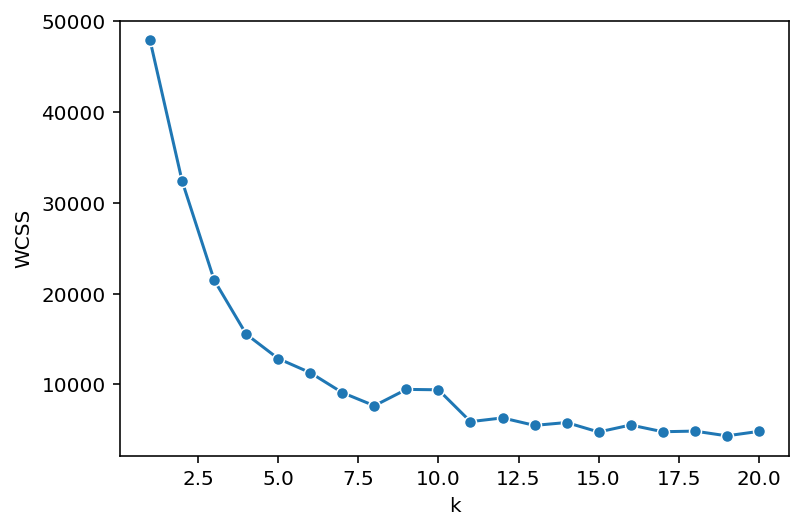

In [173]:
sns.lineplot(x=range(1,21), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [ ]:
"""writing the predicted data of k_means model into output file """
with open("pred_test_part2_new.dat", "w") as a_file:
    for i in range(len(cluster)):
        a_file.write(str(int(float(cluster[i]))))
        a_file.write('\n')